In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import calendar
import imblearn

#(ii) What types of customers will likely to choose Washer No. 2 and Dryer No. 3? (can try ohe then target jadi washer 2/dryer 3)

In [4]:
df = pd.read_csv("data/LaundryData_2021_T2.csv")

df1 = df.copy()
df1.head()

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles,latitude,longitude,Num_of_Baskets
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,short_sleeve,black,short,clothes,3,10,no,2.912316,101.657948,1.0
1,19/10/2015,20:28:42,NaN,male,thin,32.0,no,no_kids,big,NaN,...,short_sleeve,blue_jeans,long,NaN,6,9,no,2.922506,101.643129,3.0
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,short_sleeve,black,long,NaN,4,10,no,2.935533,101.737170,1.0
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,...,short_sleeve,yellow,short,clothes,5,9,no,2.949924,101.637069,1.0
4,19/10/2015,21:40:28,indian,male,NaN,34.0,no,no_kids,big,blue,...,NaN,white,long,clothes,3,9,NaN,2.903530,101.661249,3.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4000 non-null   object 
 1   Time            4000 non-null   object 
 2   Race            3802 non-null   object 
 3   Gender          3823 non-null   object 
 4   Body_Size       3817 non-null   object 
 5   Age_Range       3857 non-null   float64
 6   With_Kids       3814 non-null   object 
 7   Kids_Category   3970 non-null   object 
 8   Basket_Size     3795 non-null   object 
 9   Basket_colour   3797 non-null   object 
 10  Attire          3783 non-null   object 
 11  Shirt_Colour    3826 non-null   object 
 12  shirt_type      3815 non-null   object 
 13  Pants_Colour    3826 non-null   object 
 14  pants_type      3991 non-null   object 
 15  Wash_Item       3819 non-null   object 
 16  Washer_No       4000 non-null   int64  
 17  Dryer_No        4000 non-null   i

In [6]:
df1.isna().sum()

Date                0
Time                0
Race              198
Gender            177
Body_Size         183
Age_Range         143
With_Kids         186
Kids_Category      30
Basket_Size       205
Basket_colour     203
Attire            217
Shirt_Colour      174
shirt_type        185
Pants_Colour      174
pants_type          9
Wash_Item         181
Washer_No           0
Dryer_No            0
Spectacles        209
latitude            0
longitude           0
Num_of_Baskets    182
dtype: int64

# Cleaning the data

In [7]:
#change column headers to UPPERCASE
df1.columns = df.columns.str.upper()

#Renaming column AGE_RANGE to AGE
df1 = df1.rename(columns = {"AGE_RANGE": "AGE"})

#Replace AGE null with mean age
age_Mean = df1["AGE"].mean()
df1["AGE"] = df1["AGE"].fillna(int(age_Mean))
df1["NUM_OF_BASKETS"] = df1["NUM_OF_BASKETS"].fillna(int(age_Mean))

#Replace categorical null with mode (race, body size, kids, basket size etc)
df1['RACE'] = df1['RACE'].fillna(df1['RACE'].value_counts().index[0])
df1['GENDER'] = df1['GENDER'].fillna(df1['GENDER'].value_counts().index[0])
df1['BODY_SIZE'] = df1['BODY_SIZE'].fillna(df1['BODY_SIZE'].value_counts().index[0])
df1['WITH_KIDS'] = df1['WITH_KIDS'].fillna(df1['WITH_KIDS'].value_counts().index[0])
df1['KIDS_CATEGORY'] = df1['KIDS_CATEGORY'].fillna(df1['KIDS_CATEGORY'].value_counts().index[0])
df1['BASKET_SIZE'] = df1['BASKET_SIZE'].fillna(df1['BASKET_SIZE'].value_counts().index[0])
df1['BASKET_COLOUR'] = df1['BASKET_COLOUR'].fillna(df1['BASKET_COLOUR'].value_counts().index[0])
df1['ATTIRE'] = df1['ATTIRE'].fillna(df1['ATTIRE'].value_counts().index[0])
df1['SHIRT_COLOUR'] = df1['SHIRT_COLOUR'].fillna(df1['SHIRT_COLOUR'].value_counts().index[0])
df1['SHIRT_TYPE'] = df1['SHIRT_TYPE'].fillna(df1['SHIRT_TYPE'].value_counts().index[0])
df1['PANTS_COLOUR'] = df1['PANTS_COLOUR'].fillna(df1['PANTS_COLOUR'].value_counts().index[0])
df1['PANTS_TYPE'] = df1['PANTS_TYPE'].fillna(df1['PANTS_TYPE'].value_counts().index[0])
df1['WASH_ITEM'] = df1['WASH_ITEM'].fillna(df1['WASH_ITEM'].value_counts().index[0])
df1['SPECTACLES'] = df1['SPECTACLES'].fillna(df1['SPECTACLES'].value_counts().index[0])

#Removing '_' from column values
df1["KIDS_CATEGORY"] = df1["KIDS_CATEGORY"].str.replace("_", " ")
df1["SHIRT_TYPE"] = df1["SHIRT_TYPE"].str.replace("_", " ")

#Change blue_jeans to blue
df1["PANTS_COLOUR"] = df1["PANTS_COLOUR"].replace(["blue_jeans"], "blue")

#clean time column ';'
df1["TIME"] = df1["TIME"].str.replace(";", ":")

#Add "DATE_TIME" column
df1["DATE_TIME"] = df1["DATE"] + " " + df1["TIME"]
df1["DATE_TIME"] = pd.to_datetime(df1['DATE_TIME'])


#Add "DAY" and "WEEKDAY" column
day = df1["DATE_TIME"].dt.dayofweek
df1["DAY"] = df1["DATE_TIME"].dt.day_name()
df1["DAY_TYPE"] = (day < 5).astype(str)
df1["DAY_TYPE"] = df1["DAY_TYPE"].str.replace("True", "weekday")
df1["DAY_TYPE"] = df1["DAY_TYPE"].str.replace("False", "weekend")

df1.head()

,DATE,TIME,RACE,GENDER,BODY_SIZE,AGE,WITH_KIDS,KIDS_CATEGORY,BASKET_SIZE,BASKET_COLOUR,...,WASH_ITEM,WASHER_NO,DRYER_NO,SPECTACLES,LATITUDE,LONGITUDE,NUM_OF_BASKETS,DATE_TIME,DAY,DAY_TYPE
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,clothes,3,10,no,2.912316,101.657948,1.0,2015-10-19 20:17:50,Monday,weekday
1,19/10/2015,20:28:42,malay,male,thin,32.0,no,no kids,big,white,...,clothes,6,9,no,2.922506,101.643129,3.0,2015-10-19 20:28:42,Monday,weekday
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no kids,big,blue,...,clothes,4,10,no,2.935533,101.737170,1.0,2015-10-19 20:58:31,Monday,weekday
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no kids,big,black,...,clothes,5,9,no,2.949924,101.637069,1.0,2015-10-19 21:31:28,Monday,weekday
4,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no kids,big,blue,...,clothes,3,9,no,2.903530,101.661249,3.0,2015-10-19 21:40:28,Monday,weekday


# Exploring the Data

In [8]:
analysis = df1.copy()

df_ages = analysis['AGE']

analysis['AGE_RANGE'] = pd.cut(x=df_ages, bins=[10,20,30,40,50,60])
analysis['AGE_RANGE'].value_counts()

(30, 40]    1074
(40, 50]    1010
(50, 60]     856
(20, 30]     838
(10, 20]     222
Name: AGE_RANGE, dtype: int64

Text(0.5, 0, 'Age Range')

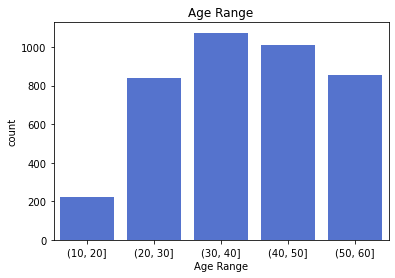

In [9]:
age = sns.countplot(data = analysis
                   , x = "AGE_RANGE"
                   , color = 'royalblue')
age.set_title("Age Range")
age.set_xlabel("Age Range")

Text(0.5, 0, 'Day')

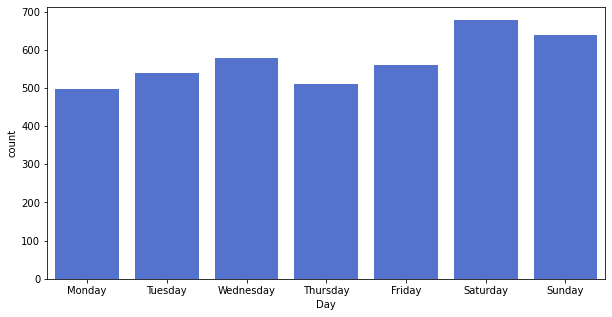

In [10]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize = fig_dims)
day = sns.countplot(data = analysis
                   ,x = "DAY"
                   ,ax=ax
                   ,color = 'royalblue')
day.set_xlabel("Day")

Text(0.5, 0, 'Gender')

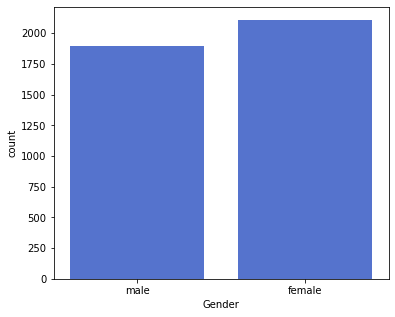

In [11]:
fig_dims = (6,5)
fig, ax = plt.subplots(figsize = fig_dims)
gender = sns.countplot(data = analysis
                   ,x = "GENDER"
                   ,ax=ax
                   ,color = 'royalblue')
gender.set_xlabel("Gender")

Text(0.5, 0, 'Race')

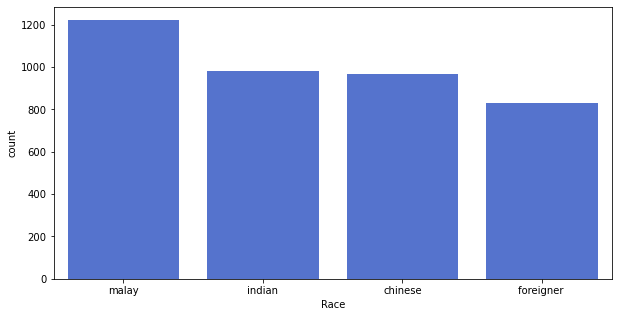

In [12]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize = fig_dims)
race = sns.countplot(data = analysis
                   ,x = "RACE"
                   ,ax=ax
                   ,color = 'royalblue')
race.set_xlabel("Race")

Text(0.5, 0, 'Day Type')

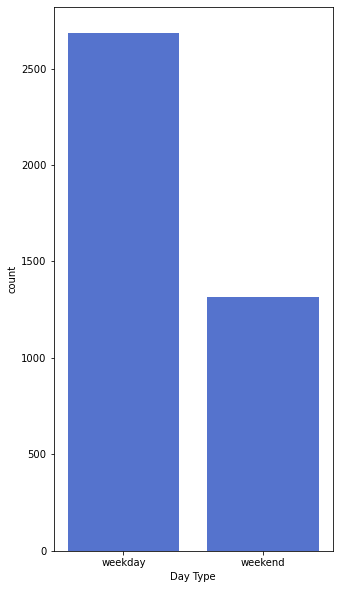

In [13]:
fig_dims = (5,10)
fig, ax = plt.subplots(figsize = fig_dims)
race = sns.countplot(data = analysis
                   ,x = "DAY_TYPE"
                   ,ax=ax
                   ,color = 'royalblue')
race.set_xlabel("Day Type")

In [14]:
df1.skew().sort_values(ascending=True)

C:\Users\User\AppData\Local\Temp/ipykernel_2880/2543688446.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew().sort_values(ascending=True)


LONGITUDE        -0.860774
LATITUDE         -0.583154
AGE              -0.068045
WASHER_NO        -0.003224
DRYER_NO          0.030519
NUM_OF_BASKETS    4.287368
dtype: float64

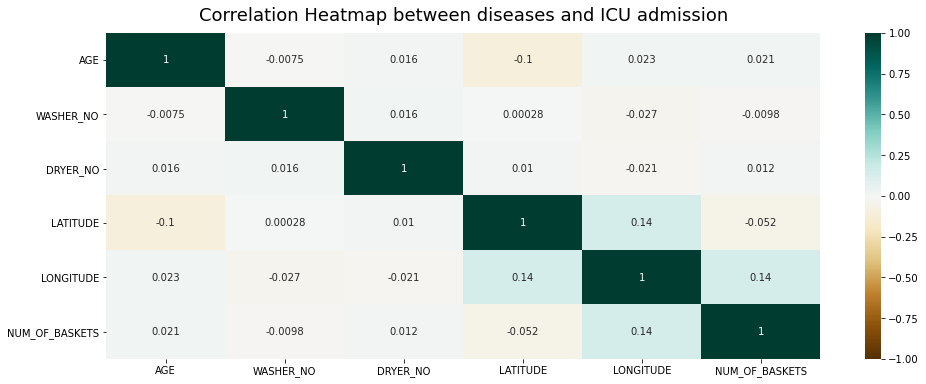

In [15]:
#not working
df2 = df1.copy()

df_corr = df2.corr()

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap between diseases and ICU admission', fontdict={'fontsize':18}, pad=12);

# Association Rule Mining


In [16]:
from mlxtend.preprocessing import TransactionEncoder
dfc = df1.copy()

te = TransactionEncoder()
te_array = te.fit(dfc).transform(dfc)
dfarm = pd.DataFrame(te_array, columns=te.columns_)

In [17]:
print(dfarm)

          A      B      C      D      E      F      G      H      I      K  \
0      True  False  False   True   True  False  False  False  False  False   
1     False  False  False  False   True  False  False  False   True  False   
2      True  False   True  False   True  False  False  False  False  False   
3     False  False  False   True   True  False   True  False  False  False   
4     False   True  False   True   True  False  False  False   True  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3995  False  False  False  False  False  False  False  False  False  False   
3996  False  False  False  False  False  False  False  False  False  False   
3997  False  False  False  False  False  False  False  False  False  False   
3998  False  False  False  False  False  False  False  False  False  False   
3999  False  False  False  False  False  False  False  False  False  False   

      ...      O      P      R      S      T      U      W     

In [22]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets_ap = apriori(dfarm, min_support=0.001, use_colnames=True)
print(frequent_itemsets_ap)

     support            itemsets
0    0.00425                 (A)
1    0.00100                 (B)
2    0.00150                 (C)
3    0.00275                 (D)
4    0.00525                 (E)
..       ...                 ...
310  0.00100     (I, H, T, _, S)
311  0.00100     (R, T, O, _, S)
312  0.00100     (T, O, _, S, U)
313  0.00100  (K, T, S, _, E, A)
314  0.00100  (R, T, O, C, S, _)

[315 rows x 2 columns]


In [26]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets_fp=fpgrowth(dfarm, min_support=0.001, use_colnames=True)
print(frequent_itemsets_fp)

     support   itemsets
0    0.00525        (E)
1    0.00450        (T)
2    0.00425        (A)
3    0.00275        (D)
4    0.00300        (I)
..       ...        ...
310  0.00100     (A, P)
311  0.00100  (T, P, S)
312  0.00100  (T, _, P)
313  0.00100  (T, E, P)
314  0.00100  (T, A, P)

[315 rows x 2 columns]


In [27]:
from mlxtend.frequent_patterns import association_rules

rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.8)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)
print(rules_ap)

    antecedents   consequents  antecedent support  consequent support  \
0           (C)           (A)             0.00150             0.00425   
1           (A)           (E)             0.00425             0.00525   
2           (K)           (A)             0.00125             0.00425   
3           (P)           (A)             0.00125             0.00425   
4           (B)           (E)             0.00100             0.00525   
..          ...           ...                 ...                 ...   
878      (C, R)  (T, O, _, S)             0.00125             0.00125   
879      (T, C)  (_, O, S, R)             0.00125             0.00125   
880      (C, O)  (T, _, S, R)             0.00100             0.00125   
881      (C, S)  (T, O, _, R)             0.00125             0.00100   
882      (C, _)  (T, O, S, R)             0.00100             0.00100   

     support  confidence         lift  leverage  conviction  
0    0.00125    0.833333   196.078431  0.001244    5.974500  

In [29]:
print(rules_fp)

    antecedents consequents  antecedent support  consequent support  support  \
0           (T)         (E)             0.00450             0.00525  0.00375   
1           (A)         (E)             0.00425             0.00525  0.00375   
2        (T, E)         (A)             0.00375             0.00425  0.00300   
3        (T, A)         (E)             0.00325             0.00525  0.00300   
4        (E, A)         (T)             0.00375             0.00450  0.00300   
..          ...         ...                 ...                 ...      ...   
878      (E, P)         (T)             0.00100             0.00450  0.00100   
879         (P)      (T, E)             0.00125             0.00375  0.00100   
880      (T, P)         (A)             0.00125             0.00425  0.00100   
881      (A, P)         (T)             0.00100             0.00450  0.00100   
882         (P)      (T, A)             0.00125             0.00325  0.00100   

     confidence        lift  leverage  

# Clustering
## K Means Clustering

In [30]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

In [31]:
x = df1[['LATITUDE','LONGITUDE']]
ss = StandardScaler()
X = ss.fit_transform(x)

print(X)

[[-1.97435428  0.21973111]
 [-1.84464068  0.07228199]
 [-1.67880246  1.00802177]
 ...
 [ 0.42822889  0.07158849]
 [ 0.87987811  0.62911819]
 [ 0.74914829  0.65056113]]


In [32]:
km = KMeans(n_clusters = 10, random_state=1)
km.fit(X)
y_km = km.predict(X)

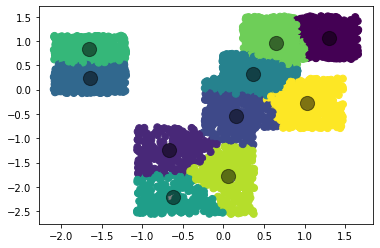

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=y_km, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Encoding the Data

## Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
df_laundry = df1.copy()
df_le = df_laundry.copy()
df_le['RACE_LE'] = LabelEncoder().fit_transform(df_laundry.RACE)
df_le['GENDER_LE'] = LabelEncoder().fit_transform(df_laundry.GENDER)
df_le['BODY_SIZE_LE'] = LabelEncoder().fit_transform(df_laundry.BODY_SIZE)
df_le['WITH_KIDS_LE'] = LabelEncoder().fit_transform(df_laundry.WITH_KIDS)
df_le['KIDS_CATEGORY_LE'] = LabelEncoder().fit_transform(df_laundry.KIDS_CATEGORY)
df_le['BASKET_SIZE_LE'] = LabelEncoder().fit_transform(df_laundry.BASKET_SIZE)
df_le['BASKET_COLOUR_LE'] = LabelEncoder().fit_transform(df_laundry.BASKET_COLOUR)
df_le['ATTIRE_LE'] = LabelEncoder().fit_transform(df_laundry.ATTIRE)
df_le['SHIRT_COLOUR_LE'] = LabelEncoder().fit_transform(df_laundry.SHIRT_COLOUR)
df_le['SHIRT_TYPE_LE'] = LabelEncoder().fit_transform(df_laundry.SHIRT_TYPE)
df_le['PANTS_COLOUR_LE'] = LabelEncoder().fit_transform(df_laundry.PANTS_COLOUR)
df_le['PANTS_TYPE_LE'] = LabelEncoder().fit_transform(df_laundry.PANTS_TYPE)
df_le['WASH_ITEM_LE'] = LabelEncoder().fit_transform(df_laundry.WASH_ITEM)
df_le['WASHER_NO_LE'] = LabelEncoder().fit_transform(df_laundry.WASHER_NO)
df_le['DRYER_NO_LE'] = LabelEncoder().fit_transform(df_laundry.DRYER_NO)
df_le['SPECTACLES_LE'] = LabelEncoder().fit_transform(df_laundry.SPECTACLES)
df_le['DAY_LE'] = LabelEncoder().fit_transform(df_laundry.DAY)
df_le['DAY_TYPE_LE'] = LabelEncoder().fit_transform(df_laundry.DAY_TYPE)

df_le = df_le.drop(['RACE', 'GENDER', 'BODY_SIZE', 'WITH_KIDS', 'KIDS_CATEGORY', 'BASKET_SIZE', 'BASKET_COLOUR', 'ATTIRE'
            , 'SHIRT_COLOUR', 'SHIRT_TYPE', 'PANTS_COLOUR', 'PANTS_TYPE', 'WASH_ITEM', 'WASHER_NO'
            , 'DRYER_NO', 'SPECTACLES', 'DAY', 'DAY_TYPE','DATE','TIME','DATE_TIME', 'LONGITUDE', 'LATITUDE'], axis=1)
df_le.head()

,AGE,NUM_OF_BASKETS,RACE_LE,GENDER_LE,BODY_SIZE_LE,WITH_KIDS_LE,KIDS_CATEGORY_LE,BASKET_SIZE_LE,BASKET_COLOUR_LE,ATTIRE_LE,SHIRT_COLOUR_LE,SHIRT_TYPE_LE,PANTS_COLOUR_LE,PANTS_TYPE_LE,WASH_ITEM_LE,WASHER_NO_LE,DRYER_NO_LE,SPECTACLES_LE,DAY_LE,DAY_TYPE_LE
0,28.0,1.0,3,1,1,1,4,0,8,0,2,1,0,1,1,0,3,0,1,0
1,32.0,3.0,3,1,2,0,1,0,9,0,10,1,2,0,1,3,2,0,1,0
2,30.0,1.0,3,0,1,0,1,0,1,0,9,1,0,0,1,1,3,0,1,0
3,51.0,1.0,2,1,2,0,1,0,0,0,0,1,13,1,1,2,2,0,1,0
4,34.0,3.0,2,1,1,0,1,0,1,0,2,1,12,0,1,0,2,0,1,0


In [36]:
df_le.isna().sum()

AGE                 0
NUM_OF_BASKETS      0
RACE_LE             0
GENDER_LE           0
BODY_SIZE_LE        0
WITH_KIDS_LE        0
KIDS_CATEGORY_LE    0
BASKET_SIZE_LE      0
BASKET_COLOUR_LE    0
ATTIRE_LE           0
SHIRT_COLOUR_LE     0
SHIRT_TYPE_LE       0
PANTS_COLOUR_LE     0
PANTS_TYPE_LE       0
WASH_ITEM_LE        0
WASHER_NO_LE        0
DRYER_NO_LE         0
SPECTACLES_LE       0
DAY_LE              0
DAY_TYPE_LE         0
dtype: int64

# One Hot Encoding

In [37]:
df_oneHot = pd.get_dummies(df1, prefix=['BASKET_SIZE'
                                        ,'DAY','DRYER_NO','PANTS_COLOUR'
                                        ,'BASKET_COLOUR','SHIRT_COLOUR'
                                        ,'KIDS_CATEGORY']
                           , columns=['BASKET_SIZE'
                                      ,'DAY','DRYER_NO','PANTS_COLOUR'
                                      ,'BASKET_COLOUR','SHIRT_COLOUR'
                                      ,'KIDS_CATEGORY'])
df_T5= df_oneHot.drop(['DATE','TIME','RACE','GENDER','BODY_SIZE','WITH_KIDS'
                       ,'ATTIRE','SHIRT_TYPE','PANTS_TYPE','WASH_ITEM'
                       ,'WASHER_NO','SPECTACLES','LATITUDE','LONGITUDE'
                       ,'DATE_TIME','DAY_TYPE'], axis=1)
df_T5

,AGE,NUM_OF_BASKETS,BASKET_SIZE_big,BASKET_SIZE_small,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,...,SHIRT_COLOUR_pink,SHIRT_COLOUR_purple,SHIRT_COLOUR_red,SHIRT_COLOUR_white,SHIRT_COLOUR_yellow,KIDS_CATEGORY_baby,KIDS_CATEGORY_no kids,KIDS_CATEGORY_toddler,KIDS_CATEGORY_toddler,KIDS_CATEGORY_young
0,28.0,1.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,32.0,3.0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,30.0,1.0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,51.0,1.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,34.0,3.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,30.0,2.0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3996,24.0,3.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3997,27.0,1.0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3998,18.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
df_T5.to_csv('ohe.csv')

## OHE for washer and dryer


In [39]:
df_corr_ohe = pd.get_dummies(df1, prefix=['WASHER_NO','DRYER_NO']
                           , columns=['WASHER_NO','DRYER_NO'])
df_corr_ohe= df_corr_ohe.drop(['DATE','TIME','RACE','GENDER','BODY_SIZE','WITH_KIDS'
                               ,'ATTIRE','SHIRT_TYPE','PANTS_TYPE','WASH_ITEM'
                               ,'SPECTACLES','LATITUDE','LONGITUDE'
                               ,'DATE_TIME','DAY_TYPE','AGE','KIDS_CATEGORY','BASKET_SIZE'
                               ,'BASKET_COLOUR','SHIRT_COLOUR','PANTS_COLOUR','NUM_OF_BASKETS','DAY'], axis=1)

df_corr_ohe

,WASHER_NO_3,WASHER_NO_4,WASHER_NO_5,WASHER_NO_6,DRYER_NO_7,DRYER_NO_8,DRYER_NO_9,DRYER_NO_10
0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
3995,0,0,0,1,1,0,0,0
3996,0,1,0,0,0,0,0,1
3997,0,1,0,0,0,0,1,0
3998,0,0,0,1,0,0,0,1


In [40]:
df2 = df_corr_ohe.copy()

df_corr = df2.corr()

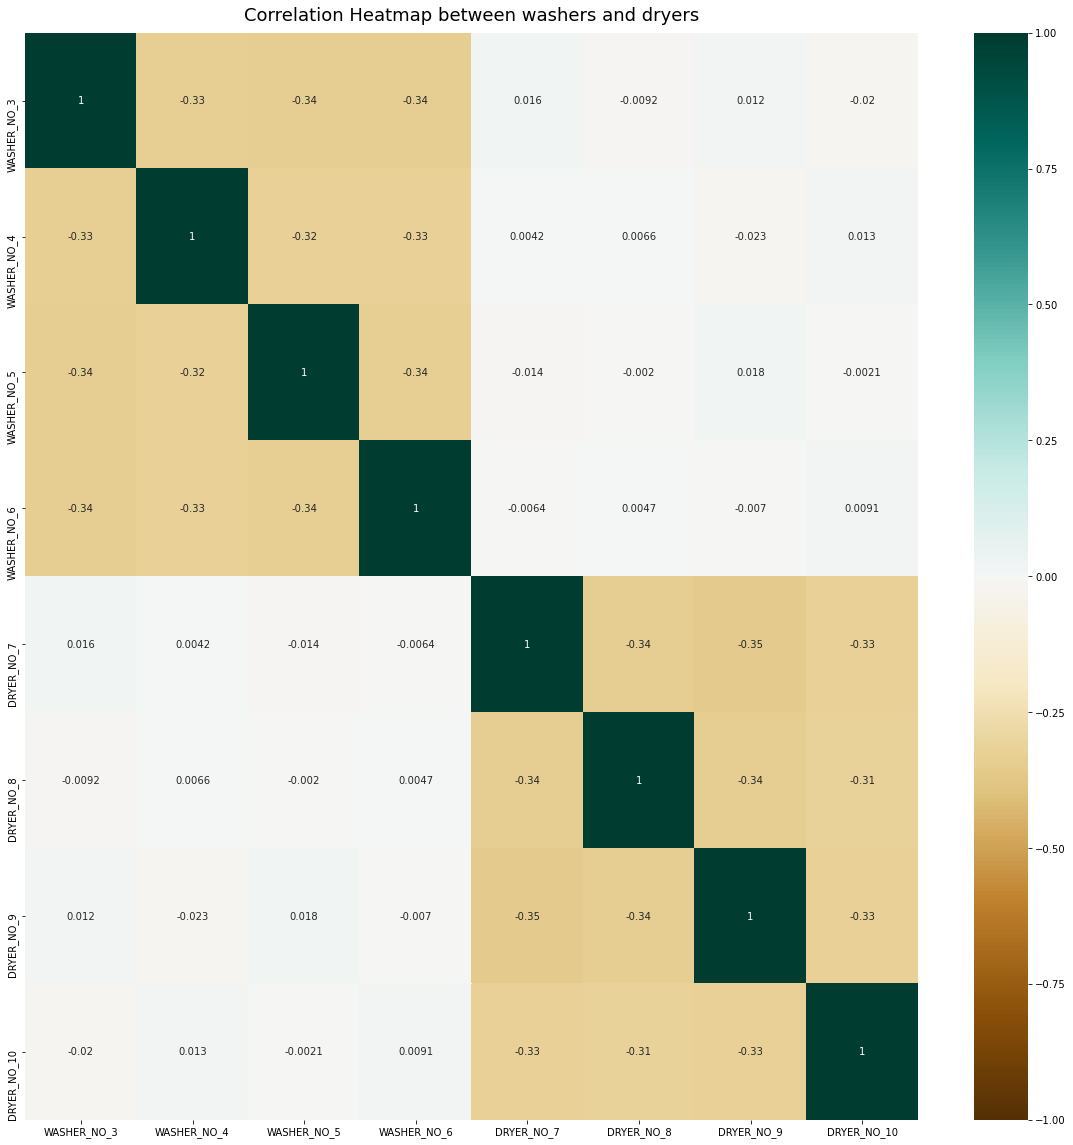

In [41]:
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap between washers and dryers', fontdict={'fontsize':18}, pad=12);

# Feature Selection Methods

In [42]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler

## Boruta
### This feature selection method is used in the classification models

In [43]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [44]:
#CHANGE X AND Y VALUE
y = df_le.BASKET_SIZE_LE
X = df_le.drop("BASKET_SIZE_LE",1)
colnames = X.columns

C:\Users\User\AppData\Local\Temp/ipykernel_2880/1168232517.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df_le.drop("BASKET_SIZE_LE",1)


In [45]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth = 5)

feat_selector = BorutaPy(rf, n_estimators="auto", random_state = 1)

In [46]:
feat_selector.fit(X.values, y.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=69, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x23D7B5ED940),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x23D7B5ED940)

In [47]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [48]:
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
display(boruta_score.tail(10))

---------Top 10----------


,Features,Score
0,AGE,1.00
6,KIDS_CATEGORY_LE,1.00
11,PANTS_COLOUR_LE,1.00
8,ATTIRE_LE,1.00
7,BASKET_COLOUR_LE,1.00
9,SHIRT_COLOUR_LE,0.93
16,SPECTACLES_LE,0.86
5,WITH_KIDS_LE,0.79
10,SHIRT_TYPE_LE,0.71
1,NUM_OF_BASKETS,0.64


---------Bottom 10----------


,Features,Score
1,NUM_OF_BASKETS,0.64
17,DAY_LE,0.57
2,RACE_LE,0.50
4,BODY_SIZE_LE,0.43
12,PANTS_TYPE_LE,0.36
14,WASHER_NO_LE,0.29
15,DRYER_NO_LE,0.21
13,WASH_ITEM_LE,0.14
18,DAY_TYPE_LE,0.07
3,GENDER_LE,0.00


Text(0.5, 1.0, 'Boruta Top 20 Features')

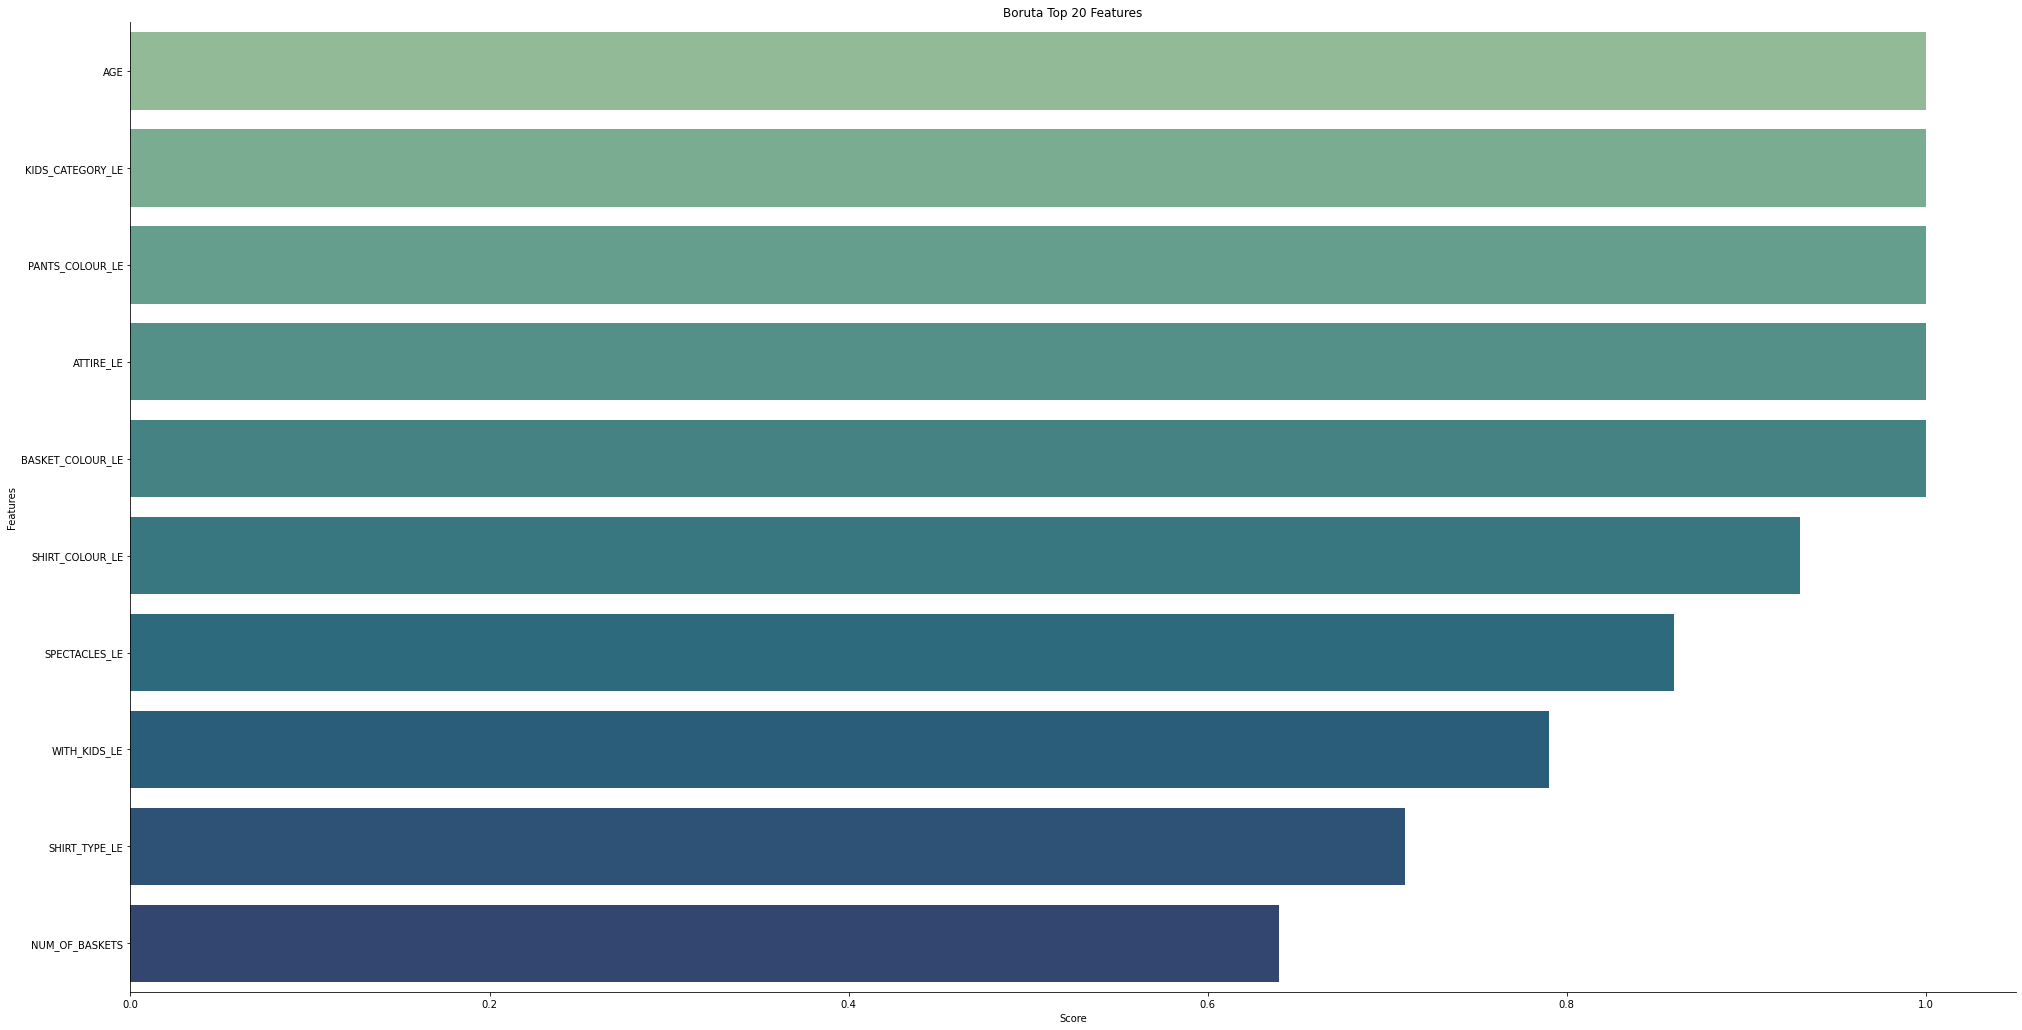

In [49]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[0:10], kind = "bar", 
               height=14, aspect=2, palette='crest')
plt.title("Boruta Top 20 Features")

In [50]:
boruta_score.to_csv('boruta.csv')

## RFE

In [51]:
#CHANGE X AND Y VALUE for Logistic Regression
y = df_le.NUM_OF_BASKETS
X = df_le.drop("NUM_OF_BASKETS",1)
colnames = X.columns

C:\Users\User\AppData\Local\Temp/ipykernel_2880/1536354082.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df_le.drop("NUM_OF_BASKETS",1)


In [52]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth = 5, n_estimators = 100)
rf.fit(X,y)
rfe = RFECV(rf, min_features_to_select = 1, cv = 3)

In [53]:
rfe.fit(X, y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1))

In [54]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

In [55]:
print('---------Top 10----------')
display(rfe_score.head(10))

print('---------Bottom 10-----------')
display(rfe_score.tail(10))

---------Top 10----------


,Features,Score
0,AGE,1.0
7,BASKET_COLOUR_LE,1.0
17,DAY_LE,1.0
15,DRYER_NO_LE,1.0
14,WASHER_NO_LE,1.0
11,PANTS_COLOUR_LE,1.0
1,RACE_LE,1.0
9,SHIRT_COLOUR_LE,1.0
6,BASKET_SIZE_LE,1.0
5,KIDS_CATEGORY_LE,1.0


---------Bottom 10-----------


,Features,Score
5,KIDS_CATEGORY_LE,1.00
16,SPECTACLES_LE,0.89
8,ATTIRE_LE,0.78
3,BODY_SIZE_LE,0.67
2,GENDER_LE,0.56
12,PANTS_TYPE_LE,0.44
13,WASH_ITEM_LE,0.33
10,SHIRT_TYPE_LE,0.22
4,WITH_KIDS_LE,0.11
18,DAY_TYPE_LE,0.00


Text(0.5, 1.0, 'RFE top 15 Features')

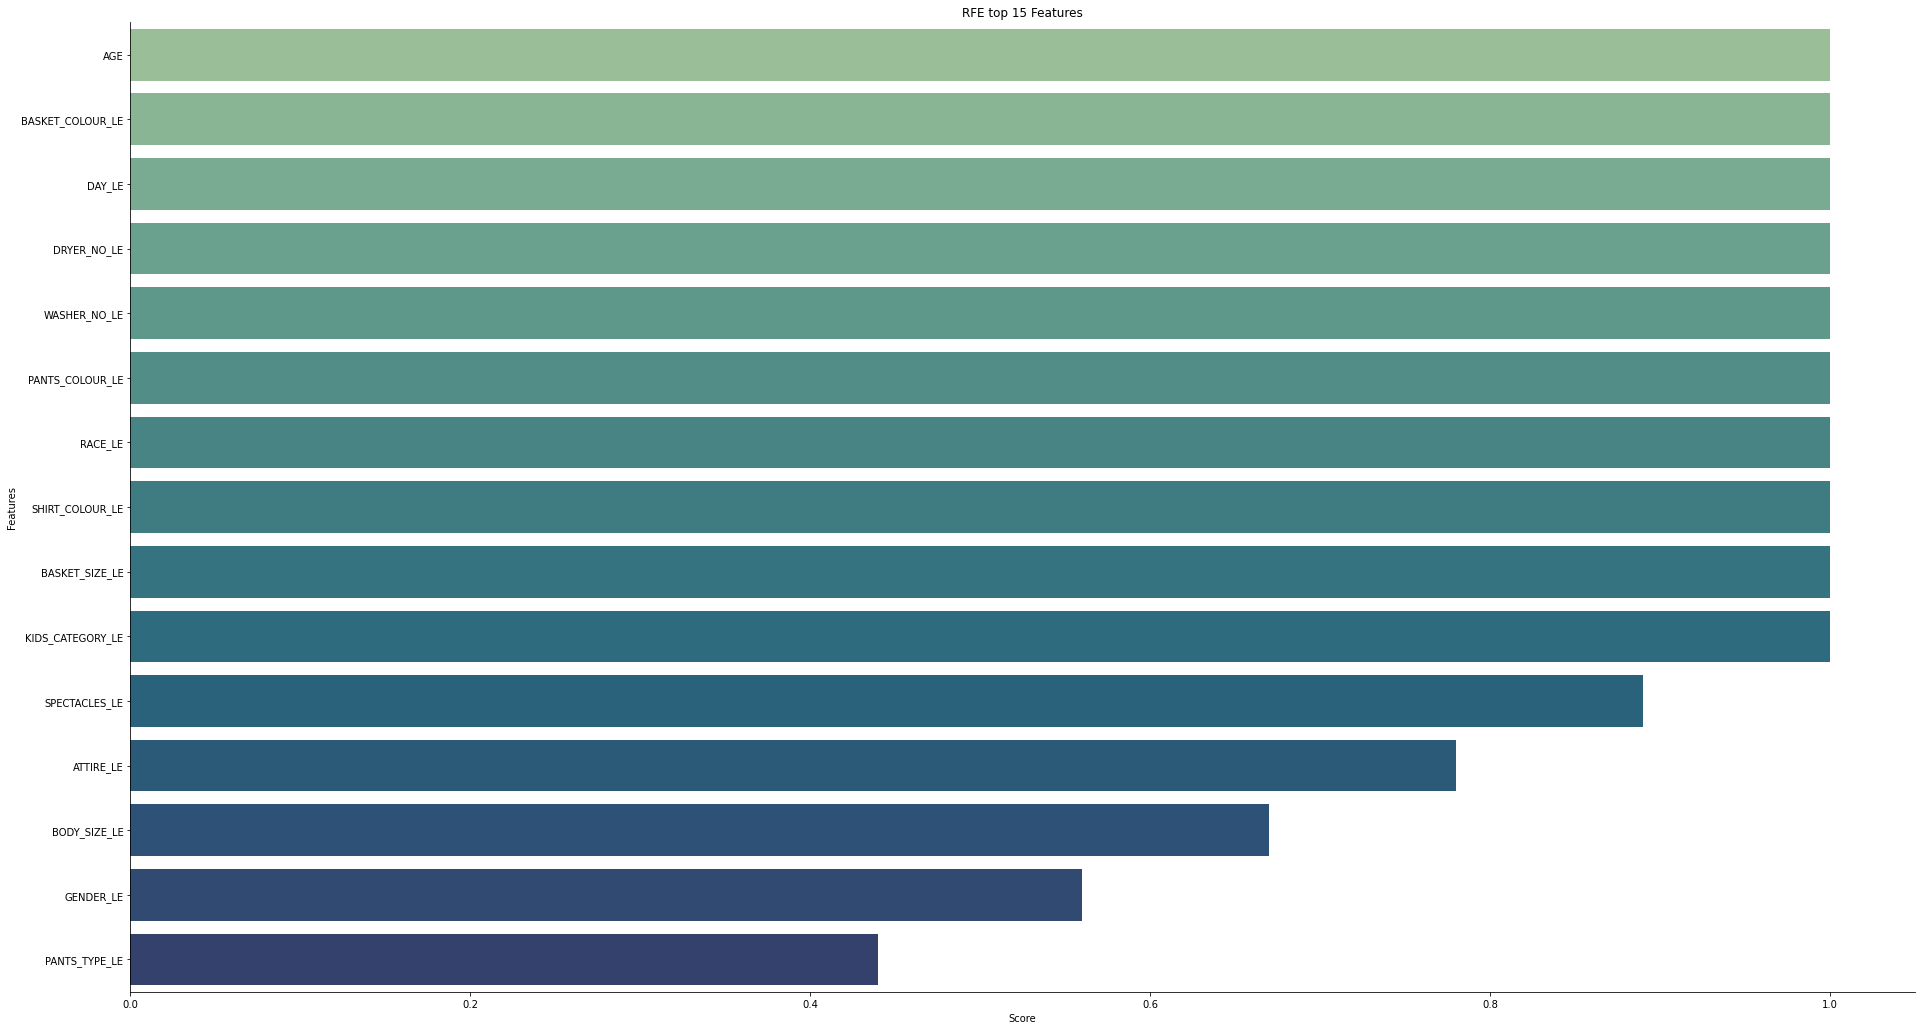

In [56]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[0:15], kind = "bar", 
               height=14, aspect=1.9, palette='crest')
plt.title("RFE top 15 Features")

In [57]:
rfe_score.to_csv('rfe.csv')


# Regression Models

## Linear Regression

In [58]:
y = df_T5.NUM_OF_BASKETS
X = df_T5.drop("NUM_OF_BASKETS",1)
colnames = X.columns

C:\Users\User\AppData\Local\Temp/ipykernel_2880/229831941.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df_T5.drop("NUM_OF_BASKETS",1)


In [59]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

1.0     1281
39.0    1281
2.0     1269
3.0     1268
Name: NUM_OF_BASKETS, dtype: int64

In [60]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=10)

In [61]:
lrm=linear_model.LinearRegression()
lrm_model = lrm.fit(X_train,y_train)
lrm_pred = lrm.predict(X_test)

In [62]:
lrm_pred[0:10]

array([ 5.40849903,  1.99836979,  3.31831009,  4.31966813, 25.30344035,
        5.46049545,  3.45208618,  3.17457583,  0.80499389,  4.04172941])

In [63]:
y_test[0:10]

2193     3.0
890      3.0
1450     2.0
2773     3.0
4085    39.0
406      2.0
1731     3.0
1207     2.0
885      2.0
2719     1.0
Name: NUM_OF_BASKETS, dtype: float64

Text(0, 0.5, 'Predicted values')

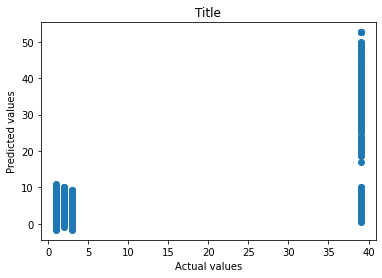

In [64]:
plt.scatter(y_test, lrm_pred)
plt.title("Title")
plt.xlabel('Actual values')
plt.ylabel('Predicted values')


# Multinomial Logistic Regression

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, r2_score, mean_squared_error
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import validation_curve
from sklearn.multiclass import OneVsRestClassifier

In [66]:
y = df_T5.NUM_OF_BASKETS
X = df_T5.drop("NUM_OF_BASKETS",1)
colnames = X.columns

C:\Users\User\AppData\Local\Temp/ipykernel_2880/229831941.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df_T5.drop("NUM_OF_BASKETS",1)


In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

1.0     1281
39.0    1281
2.0     1269
3.0     1268
Name: NUM_OF_BASKETS, dtype: int64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=0) #70% train 30% test

In [69]:
model = OneVsRestClassifier(LogisticRegression(multi_class='multinomial', C=0.15, penalty="l2", solver='lbfgs',max_iter=5000))

In [70]:
model.fit(X_train, y_train)

#Predict using model
y_pred = model.predict(X_test)

#Saving accuracy score in table
result = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
print("Accuracy = ",result)
print("Precision = ", precision)
print("Recall = ", recall)

Accuracy =  0.4803921568627451
Precision =  0.505436412099208
Recall =  0.4803921568627451


In [71]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


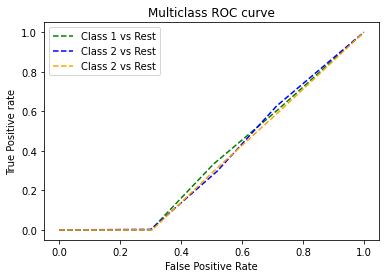

In [72]:
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred, pos_label=i)
    
# plotting    
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='orange', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

# Classification Models

# Random Forest

In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE

In [74]:
y = df_le.BASKET_SIZE_LE
X = df_le.drop("BASKET_SIZE_LE",1)
colnames = X.columns

C:\Users\User\AppData\Local\Temp/ipykernel_2880/3608236758.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df_le.drop("BASKET_SIZE_LE",1)


In [75]:
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

0    2402
1    2402
Name: BASKET_SIZE_LE, dtype: int64

In [76]:
#Smote split data 
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=0, stratify=y_sm) #70% train 30% test

In [77]:
n_estimators=[int(x) for x in np.linspace(start=10, stop=400, num=10)]
bootstrap=[True,False]
max_depth=[None]

In [78]:
param_grid={'n_estimators': n_estimators,
            'bootstrap': bootstrap,
            'max_depth': max_depth
            }

In [ ]:
rfModel = RandomForestClassifier()
rfGrid = GridSearchCV(estimator= rfModel, param_grid=param_grid, cv=3, verbose=2, n_jobs=4)
rfGrid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
rfGrid.best_params_

In [ ]:
rf=RandomForestClassifier(n_estimators=226, bootstrap=True,max_depth=None)
rf.fit(X_train, y_train)

In [ ]:
y_predicted = rf.predict(X_test)

# Accuracy

In [ ]:
score = rf.score(X_test, y_test)
print("Accuracy: %.2f" % score)

# AUC

In [ ]:
prob_RF = rf.predict_proba(X_test)
prob_RF = prob_RF[:, 1]

auc_RF= roc_auc_score(y_test, prob_RF)
print('AUC: %.2f' % auc_RF)

In [ ]:
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, prob_RF) 

plt.plot(fpr_RF, tpr_RF, color='blue', label='RF') 
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Confusion Matrix

In [ ]:
confusion_majority = confusion_matrix(y_test, y_predicted)

print('Precision= {:.2f}'.format(precision_score(y_test, y_predicted)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_predicted)))
print('F1= {:.2f}'. format(f1_score(y_test, y_predicted)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_predicted)))

In [ ]:
confusion_matrix(y_test,y_predicted)

pd.crosstab(y_test,y_predicted, rownames =['Actual'], colnames=['Predicted'], margins=True)

# Naive Bayes

In [ ]:
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=0, stratify=y_sm) #70% train 30% test

In [ ]:
y_train.value_counts()

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [ ]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb,verbose=1,cv=10,n_jobs=-1)

In [ ]:
nbModel_grid.fit(X_train,y_train)

In [ ]:
print(nbModel_grid.best_estimator_)

In [ ]:
nb = GaussianNB(priors = None, var_smoothing = 0.0001)

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(X_train,y_train)

In [ ]:
y_pred = nb.predict(X_test)

# Accuracy

In [ ]:
score = nb.score(X_test, y_test)
print("Accuracy: ",score)

## AUC

In [ ]:
prob_NB = nb.predict_proba(X_test)
prob_NB = prob_NB[:, 1]

auc_NB= roc_auc_score(y_test, prob_NB)
print('AUC: %.2f' % auc_NB)

In [ ]:
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, prob_NB) 

plt.plot(fpr_NB, tpr_NB, color='orange', label='NB') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

## Confusion Matrix

In [ ]:
confusion_majority = confusion_matrix(y_test, y_pred)

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
confusion_matrix(y_test,y_pred)

pd.crosstab(y_test,y_pred, rownames =['Actual'], colnames=['Predicted'], margins=True)